In [14]:
## подготовка - создание таблицы с кухнями
import pandas as pd
import numpy as np
DATA_DIR = '.'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')
df = df_test.append(df_train, sort=False).reset_index(drop=True) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   Rating             40000 non-null  float64
dtypes: float64(3), object(7)
memory usage: 3.8+ MB


In [15]:
def str_to_arr(string):
    if pd.isna(string):
        return
    arr = []
    arr_temp = np.array([])
    if string[0] == '[' and string[-1] == ']':
        string = string[1:-1]
        arr_temp = np.array(string.split(', '))
    for a in arr_temp:
        a = a.replace("'", '')
        arr.append(a)
    arr = np.array(arr)
    return arr
df['Cuisine Style'] = df['Cuisine Style'].apply(str_to_arr)

In [16]:
df['Cuisine Style'] = df['Cuisine Style'].fillna('n')

In [17]:
citchen_wariable_arr = []
def citchen_wariable(arr):
    for i in arr:
        if i != 'n':
            if i not in citchen_wariable_arr:
                citchen_wariable_arr.append(i)
                
df['Cuisine Style'].apply(citchen_wariable)
citchen_wariable_arr.sort()
citchen_wariable_arr_new = []
for i in citchen_wariable_arr:
    i = 'citchen_{0}'.format(i.replace(' ', '_'))
    citchen_wariable_arr_new.append(i)
len(citchen_wariable_arr)

125

In [18]:
citchens =  pd.DataFrame(np.zeros(shape=(len(df), len(citchen_wariable_arr))), columns=citchen_wariable_arr_new)

In [22]:
for i in df.index:
    citchen = df.loc[i]['Cuisine Style']
    if type(citchen) != 'str':
        for j in citchen:
            j = j.replace(' ', '_')
            citchens.loc[i, 'citchen_{0}'.format(j)] = 1

In [23]:
citchens.citchen_n = citchens.citchen_n.fillna(0)

In [24]:
citchens.to_csv('citchens.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 126 entries, citchen_Afghani to citchen_n
dtypes: float64(126)
memory usage: 48.1 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa159ec4750>,
      dtype=object)

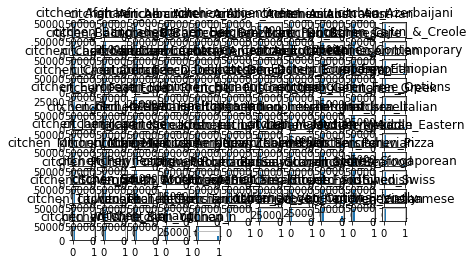

In [27]:
citchens.info()